In [82]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    
import provid

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from provid.source import download_all

In [29]:
srcs = download_all()

In [32]:
for name, src in srcs.items():
    src.parse()

/Users/dsuo/miniconda3/envs/provid/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# National patient data

In [36]:
srcs["national_patient"].df

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/06/05,2020/04/08,NaN,Laboratory-confirmed case,Male,0 - 9 Years,"Black, Non-Hispanic",Unknown,Unknown,Unknown,Unknown
1,2020/06/05,2020/04/08,2020/04/08,Laboratory-confirmed case,Male,0 - 9 Years,"Black, Non-Hispanic",No,Unknown,No,Unknown
2,2020/05/13,2020/04/08,2020/05/03,Laboratory-confirmed case,Male,0 - 9 Years,"Black, Non-Hispanic",Yes,Yes,No,No
3,2020/04/11,2020/04/08,NaN,Laboratory-confirmed case,Male,0 - 9 Years,"Black, Non-Hispanic",Unknown,Unknown,Unknown,Unknown
4,2020/04/14,2020/04/08,NaN,Laboratory-confirmed case,Male,0 - 9 Years,"Black, Non-Hispanic",Unknown,Unknown,Unknown,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1748960,2020/04/18,2020/04/13,NaN,Laboratory-confirmed case,Male,80+ Years,Unknown,Yes,Unknown,Yes,Yes
1748961,2020/06/10,2020/04/13,NaN,Laboratory-confirmed case,Unknown,80+ Years,Unknown,No,Unknown,No,Unknown
1748962,2020/04/16,2020/04/13,NaN,Laboratory-confirmed case,Unknown,80+ Years,Unknown,Unknown,Unknown,Unknown,Unknown
1748963,2020/06/05,2020/04/13,NaN,Laboratory-confirmed case,Unknown,80+ Years,Unknown,Unknown,Unknown,Unknown,Unknown


## Cases by age

In [69]:
srcs["national_patient"].df.age_group.value_counts(normalize=True) * 100

50 - 59 Years    17.391921
40 - 49 Years    16.453574
30 - 39 Years    16.367350
20 - 29 Years    14.449545
60 - 69 Years    13.067041
80+ Years         8.139276
70 - 79 Years     7.622445
10 - 19 Years     4.331970
0 - 9 Years       2.058291
Unknown           0.118587
Name: age_group, dtype: float64

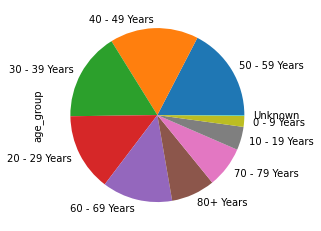

In [72]:
srcs["national_patient"].df.age_group.value_counts(normalize=True).plot.pie()

In [65]:
srcs["national_patient"].df.age_group.value_counts(normalize=True) * 100

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
age_group,,,,,,,,,,
0 - 9 Years,35998,11353,14085,35998,35998,35998,35998,35998,35998,35998
10 - 19 Years,75763,30095,32941,75763,75763,75763,75763,75763,75763,75763
20 - 29 Years,252712,97268,119520,252712,252712,252712,252712,252712,252712,252712
30 - 39 Years,286253,114295,132689,286253,286253,286253,286253,286253,286253,286253
40 - 49 Years,287761,114310,133574,287761,287761,287761,287761,287761,287761,287761
50 - 59 Years,304172,125410,138486,304172,304172,304172,304172,304172,304172,304172
60 - 69 Years,228533,94131,100037,228533,228533,228533,228533,228533,228533,228533
70 - 79 Years,133311,53366,54915,133311,133311,133311,133311,133311,133311,133311
80+ Years,142350,55249,52750,142350,142350,142350,142350,142350,142350,142350


## Deaths by age

In [74]:
srcs["national_patient"].df[srcs["national_patient"].df.death_yn == "Yes"].age_group.value_counts(normalize=True) * 100

80+ Years        45.177465
70 - 79 Years    24.160581
60 - 69 Years    16.500947
50 - 59 Years     7.948134
40 - 49 Years     2.965912
0 - 9 Years       1.555347
30 - 39 Years     1.197649
20 - 29 Years     0.399216
Unknown           0.051100
10 - 19 Years     0.043648
Name: age_group, dtype: float64

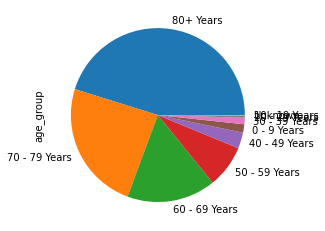

In [75]:
srcs["national_patient"].df[srcs["national_patient"].df.death_yn == "Yes"].age_group.value_counts(normalize=True).plot.pie()

# County data

In [44]:
# Mercer, NJ
code = "021"

In [50]:
srcs["county_case"].df

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,503,527,537,553,561,568,591,615,618,644
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,575,643,680,703,751,845,863,881,911,997
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,317,322,325,326,335,348,350,352,356,360
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,162,165,170,174,179,189,190,193,197,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,82,86,89,89,92,100,102,106,113,122
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,123,128,129,134,136,135,137,140,145,146
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,168,174,176,177,180,182,183,184,190,190
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,39,39,39,39,39,39,39,39,39,40


In [108]:
cases = srcs["county_case"].df[srcs["county_case"].df.countyFIPS == 34021]
deaths = srcs["county_death"].df[srcs["county_death"].df.countyFIPS == 34021]

In [109]:
cases = cases.drop(labels=["countyFIPS", "County Name", "State", "stateFIPS"], axis=1)
deaths = deaths.drop(labels=["countyFIPS", "County Name", "State", "stateFIPS"], axis=1)

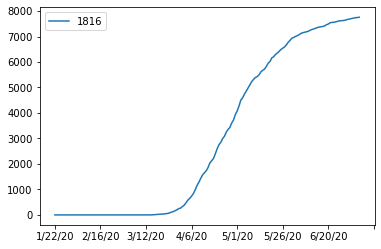

In [125]:
cases.T.plot()

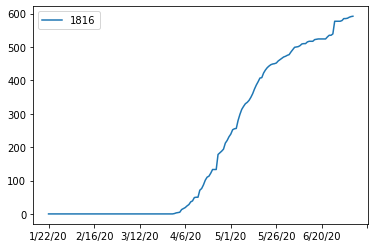

In [126]:
deaths.T.plot()

# Princeton data

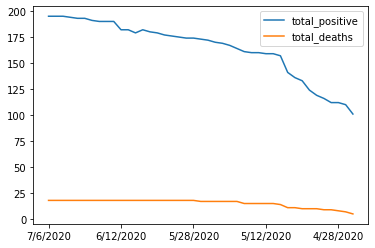

In [139]:
srcs["princeton"].df[["total_positive", "total_deaths"]].plot()